# Mustererkennung/Machine Learning - Assignment 8



In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
%matplotlib inline



In [3]:
class Classifier:
    def accuracy(self, labels, predictions):
        return np.mean(labels == predictions)

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2, random_state=None, stratify=iris['target'])

X_train_setosa = X_train[y_train==0]
X_train_versicolor = X_train[y_train==1]
X_train_virginica = X_train[y_train==2]

X_test_setosa_v_v = X_test
y_test_setosa_v_v = np.where(y_test == 0,1,0)
X_test_versicolor_virginica = X_test[y_test!=0]
y_test_versicolor_virginica = np.where(y_test[y_test!=0] == 1,1,0)

# Excercise 1 Solution: Perceptron

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class MyPerceptron(Classifier):
  def __init__(self, tol, max_iter=100):
    self.tol = tol
    self.sep_hp = 0
    self.max_iter = max_iter

  def fit(self, X, y):
    """ Input:
    X -- Training data
    y -- Training labels
    --------------------
    Return:
    -> w_prime -- vector defining the separating hyperplane
    """

    X = X - np.mean(X, axis=0)  # normalize data

    n, m = X.shape 

    w_prime = np.mean(X, axis=0)
    w = 0
    current_iter = 0

    while (np.linalg.norm(w_prime - w) <= self.tol) and (current_iter < self.max_iter):
      w = w_prime
      ix = np.random.randint(n)
      v = X[ix]
      if y[ix] == 1 and np.dot(w, v.T) > 0:
        current_iter += 1
        continue
      elif y[ix]==1 and np.dot(w, v.T) <= 0:
        current_iter += 1
        w_prime = w + v
      elif y[ix]==-1 and np.dot(w,v.T) < 0:
        current_iter += 1
        continue
      else:
        current_iter += 1
        w_prime = w - v

    self.sep_hp = w_prime

      
    return w_prime

  def predict(self, X):
    """ Input:
    X -- Data to predict
    ---------------------
    Return:
    -> y -- predicted labels
    """
    X = X - np.mean(X, axis=0)  # normalize data
    return np.sign(np.dot(X, self.sep_hp))

  def accuracy(self, X, y):
    """ Input:
    X -- Test data
    y -- Test labels
    -----------------------
    Return:
    -> p -- percentage of correct predictions
    """
    n = y.shape
    y_prediction = self.predict(X)
    
    return np.sum(y==y_prediction)/n



['setosa' 'versicolor' 'virginica']
number of measurements: 150
[ 0.2275      0.0625     -0.35583333 -0.0875    ]
[0.8275     1.0625     0.24416667 0.2125    ]
[-0.1275      0.7375     -2.04416667 -0.9125    ]
[ 0.2275      0.5625     -0.15583333  0.1125    ]
[0.1275     0.4625     0.24416667 0.2125    ]
[-0.3275      1.1375     -2.34416667 -1.0125    ]
[0.8275     1.0625     0.24416667 0.2125    ]
[-0.1725      0.8625     -1.25583333 -0.2875    ]
[ 0.4275      0.0625     -0.75583333 -0.2875    ]
[ 0.2275      0.5625     -0.15583333  0.1125    ]
[-0.3275      1.1375     -2.34416667 -1.0125    ]
[-0.1725      0.8625     -1.25583333 -0.2875    ]
[ 0.2275      0.0625     -0.35583333 -0.0875    ]
[ 0.3275      0.5625     -0.25583333 -0.0875    ]
[ 0.2275      0.2625     -1.15583333 -0.7875    ]
[-0.1725      0.8625     -1.25583333 -0.2875    ]
[-0.3275      1.1375     -2.34416667 -1.0125    ]
[0.1275     0.4625     0.24416667 0.2125    ]
[-0.1725      0.8625     -0.25583333  0.2125    ]
[-

Text(0.5, 1.0, 'Accuracy in 100 runs')

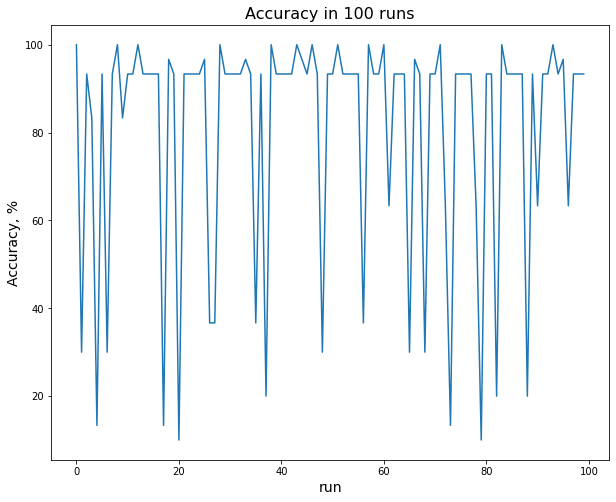

In [53]:
 # Ok now Iris dataset
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.target_names)
n, m = iris.data.shape
print('number of measurements:', n)

setosa_labels = iris['target'].copy()
setosa_labels[iris['target'] != 0] = -1
setosa_labels[iris['target'] == 0] = 1
# print(setosa_labels)


ix_shuffled = np.random.permutation(n)
data_shuffled = iris.data[ix_shuffled]
setosa_labels_shuffled = setosa_labels[ix_shuffled]

tt_cutoff = int(round(n*0.8))
X_setosa_train = data_shuffled[:tt_cutoff]
y_setosa_train = setosa_labels_shuffled[:tt_cutoff]

X_setosa_test = data_shuffled[tt_cutoff:]
y_setosa_test = setosa_labels_shuffled[tt_cutoff:]

# print(X_setosa_test)
# print(y_setosa_test)


accuracy_in_runs = []
for i in range(100):
  perceptron = MyPerceptron(tol=1e-3)
  perceptron.fit(X_setosa_train, y_setosa_train)
  print(perceptron.sep_hp)
  accuracy = perceptron.accuracy(X_setosa_test, y_setosa_test)
  accuracy_in_runs.append(accuracy)
print('setosa, non-setosa classification accuracy:', max(accuracy_in_runs))
fig =  plt.figure(figsize=(10,8))
plt.plot(range(0,100),[100*i for i in accuracy_in_runs])
plt.ylabel('Accuracy, %', fontsize = 14)
plt.xlabel('run',fontsize =14)
plt.title("Accuracy in 100 runs", fontsize =16)


In [37]:
from sklearn.model_selection import train_test_split

versicolor_labels = iris['target'][iris['target'] != 0].copy()
versicolor_labels[versicolor_labels == 2] = -1

data = iris['data'][iris['target'][iris['target'] != 0]] # Ok this line is a bit ridiculous

# print(versicolor_labels)
# print(data)

X_train, X_test, y_train, y_test = train_test_split(data, versicolor_labels, test_size=0.2)

perceptron = MyPerceptron(tol=1e-1)
perceptron.fit(X_train, y_train)
accuracy = perceptron.accuracy(X_test, y_test)

print('versicolor-virignica accuracy:', accuracy)



versicolor-virignica accuracy: [1.]


# Excercise 2 Solution: Multilayer-Perceptron (MLP)

#### Splitting the data into training/test and according to their class memberships

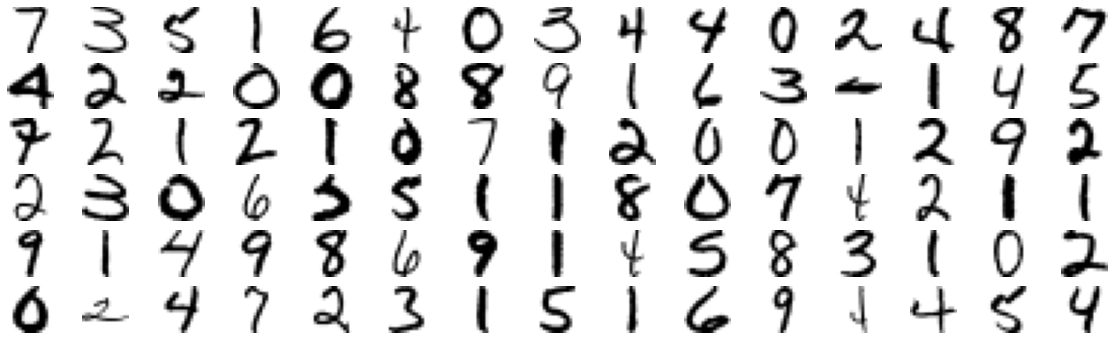

In [5]:
training_data = np.array(pd.read_csv('/home/sofya/Documents/UNI/ML/zip.train', sep=' ', header=None))
test_data = np.array(pd.read_csv('/home/sofya/Documents/UNI/ML/zip.test', sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]
def show_numbers(X):
    num_samples = 90
    indices = np.random.choice(range(len(X)), num_samples)
    sample_digits = X[indices]

    fig = plt.figure(figsize=(20, 6))

    for i in range(num_samples):
        ax = plt.subplot(6, 15, i + 1)
        img = 255 - sample_digits[i].reshape((16, 16))
        plt.imshow(img, cmap='gray')
        plt.axis('off')
show_numbers(X_train)

In [6]:
#y_labels in form of vector  for digits for multiclass
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
# 0 -> (1, 0, 0, 0), 1 -> (0, 1, 0, 0), 2 -> (0, 0, 1, 0), 3 -> (0, 0, 0, 1)
y_OH_train = enc.fit_transform(np.expand_dims(y_train,1)).toarray()
y_OH_test = enc.fit_transform(np.expand_dims(y_test,1)).toarray()
#print( X_train)

In [7]:
#Data Normalization/standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [57]:
# define a few activation functions 
class Sigmoid:
    def activation(z):
        return 1 / (1 + np.exp(-z))
    def gradient(z):
        return Sigmoid.activation(z) * (1 - Sigmoid.activation(z))
class Relu:
    def activation(z):
        z[z < 0] = 0
        return z
    def gradient(x):
        x[x<=0] = 0
        x[x>0] = 1
        return x
    
class softmax:
    def activation(x):
        exps = np.exp(x)
        return exps / np.sum(exps)

In [ ]:
class MLP:
    def __init__(self, depth, width, activation_functions, learning_rate = 0.1):
        self.depth = depth
        self.width = width
        self.activation = activation_functions
        self.learning_rate = learning_rate

        for i in range(1, depth)

        self.w
        self.b


In [556]:

class Multilayer_perceptron:
    def __init__(self, total_layer=2,dimensions=None, activations=None, learning_rate=0.1):
        """
        parameters
        1. total_layer: no of layers including input layer, hidden layers and output layer
        2. dimensions: Dimensions of the neural net. (no of input, no of nodes in hidden layer, no of neuron in  output)
        3. activations:Activations functions for each layer.
        4. learning_rate: learning 

        """

        self.depth = total_layer
        self.loss = None
        self.learning_rate = learning_rate
        self.sizes=dimensions
        self.width = n_per_layer

        # Weights and biases are initiated by index. For a one hidden layer net you will have a w[1] and w[2]
        self.w = {}
        self.b = {}

        # Activations are also initiated by index. For the example we will have activations[2] and activations[3]
        self.activations = {}

        for i in range(len(dimensions) - 1):
            self.w[i + 1] = np.random.randn(dimensions[i], dimensions[i + 1]) / np.sqrt(dimensions[i])
            self.b[i + 1] = np.zeros((1,dimensions[i + 1]))
            self.activations[i + 2] = activations[i]
            
    def _feed_forward(self, x):
        """
        Execute a forward feed through the network.

         x:input data vectors.
        return:  Node outputs and activations per layer. 
                 The numbering of the output is equivalent to the layer numbers.
        """

        # w(x) + b
        z = {}

        # activations: f(z)
        a = {1: x.reshape(1,-1)}  # First layer has no activations as input. The input x is the input.

        for i in range(1, self.n_layers):
            # current layer = i
            # activation layer = i + 1
            z[i + 1] = np.matmul(a[i], self.w[i]) + self.b[i]
            a[i + 1] = self.activations[i + 1].activation(z[i + 1])

        return z, a
    #gradient calculation 
    def grad(self, x, y):
        self.Z,self.A=self._feed_forward(x)
        self.dW = {}
        self.dB = {}
        self.dZ = {}
        self.dA = {}
        L = self.n_layers
        self.dZ[L] = (self.A[L] - y)
        
        for k in range(L, 1, -1):
          #print('iter',k)
          #self.A[k-1]=np.array(self.A[k-1]).reshape(self.A[k-1].shape[0],1)
          self.dW[k-1] = np.matmul(self.A[k-1].T, self.dZ[k])
          #print('dw',self.dW[k-1])
          self.dB[k-1] = self.dZ[k]
          #print('dB',self.dB[k-1])
          self.dA[k-1] = np.matmul(self.dZ[k], self.w[k-1].T)
          self.dZ[k-1] = np.multiply(self.dA[k-1], Sigmoid.gradient(self.A[k-1])) 
    
    def fit(self, X, Y, epochs=100, display_loss=True):

        if display_loss:
          loss = {}

        for epoch in range(epochs):
          dW = {}
          dB = {}
          for i in range(self.n_layers - 1):
            dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
            dB[i+1] = np.zeros((1, self.sizes[i+1]))
          for x, y in zip(X, Y):
            self.grad(x, y)
            for i in range(self.n_layers-1):
              dW[i+1] += self.dW[i+1]
              dB[i+1] += self.dB[i+1]

          total_samples = X.shape[1]
          #print(total_samples)
          for i in range(self.n_layers-1):
            #self.b[i+1]=self.b[i+1].reshape(1,-1)
            #print(dB[i+1].shape)
            self.w[i+1] -= self.learning_rate * (dW[i+1]/total_samples)
            self.b[i+1] -= self.learning_rate * (dB[i+1]/total_samples)

          if display_loss:
            Y_pred = self.predict(X) 
            loss[epoch] = self.cross_entropy(Y, Y_pred)
            if epoch%50==0:
                print("epoch",epoch,'loss:',loss[epoch])
        #loss plot
        if display_loss:
          plt.plot(loss.values())
          plt.xlabel('Epochs')
          plt.ylabel('CE')
          plt.show()
    #prediction method
    def predict(self, X):
        Y_pred = []
        for x in X:
          lin_sum,output = self._feed_forward(x)
          Y_pred.append(output[self.n_layers])
        return np.array(Y_pred).squeeze()
    #cross entropy calculation function
    def cross_entropy(self,label,pred):
        yl=np.multiply(pred,label)
        yl=yl[yl!=0]
        yl=-np.log(yl)
        yl=np.mean(yl)
        return yl

In [60]:
X_train.shape[1], 16, len(np.unique(y_train))

(256, 16, 10)

In [557]:
#dimenstions=(nodes_inputlayer,nodes_hidden_layer1,nodes_hidden_layer2, ....., nodes_hidden_layern,nodes_output_layer)
dimenstions=(X_train.shape[1], 16, len(np.unique(y_train)))
#activations=(activation_function_of_hidden_layer1,activation_function_of_hidden_layer2, ...., activation_function_of_output_layer )
activations_funct_list= ( Sigmoid, softmax)
mlp = Multilayer_perceptron(total_layer=len(dimenstions),dimensions=dimenstions, activations= activations_funct_list,learning_rate=0.01)

epoch 0 loss: 2.3171607366681704
epoch 50 loss: 0.9551157641700734
epoch 100 loss: 0.6866224494517499
epoch 150 loss: 0.5587827831491928
epoch 200 loss: 0.4848152570763058
epoch 250 loss: 0.4370536849718331
epoch 300 loss: 0.4034827544202183
epoch 350 loss: 0.3783786043696433
epoch 400 loss: 0.358746591541936
epoch 450 loss: 0.3428852922605379
epoch 500 loss: 0.3299220551240432
epoch 550 loss: 0.3191513839824829
epoch 600 loss: 0.31002498008670654
epoch 650 loss: 0.30208748630098503
epoch 700 loss: 0.29499264820459753
epoch 750 loss: 0.2885634715139001
epoch 800 loss: 0.2827714080404607
epoch 850 loss: 0.2775670810933319
epoch 900 loss: 0.272884989024984
epoch 950 loss: 0.268600455105745


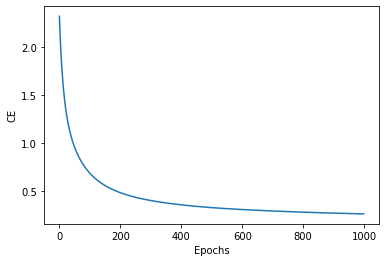

In [558]:
mlp.fit( X_train,y_OH_train, epochs=1000, display_loss=True)

In [561]:
import sklearn
Y_pred_train = mlp.predict(X_train)
Y_pred_train = np.argmax(Y_pred_train,1)

Y_pred_test = mlp.predict(X_test)
Y_pred_test = np.argmax(Y_pred_test,1)

accuracy_train = accuracy_score(Y_pred_train, y_train)
accuracy_test = accuracy_score(Y_pred_test, y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Test Dataset accuracy", round(accuracy_test, 2))
print(sklearn.metrics.classification_report(y_test, Y_pred_test))

Training accuracy 0.93
Test Dataset accuracy 0.88
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       359
         1.0       0.97      0.95      0.96       264
         2.0       0.88      0.79      0.83       198
         3.0       0.88      0.83      0.85       166
         4.0       0.82      0.84      0.83       200
         5.0       0.82      0.86      0.84       160
         6.0       0.85      0.92      0.88       170
         7.0       0.89      0.90      0.89       147
         8.0       0.85      0.77      0.81       166
         9.0       0.85      0.88      0.86       177

    accuracy                           0.88      2007
   macro avg       0.87      0.87      0.87      2007
weighted avg       0.88      0.88      0.88      2007



In [71]:
X_train.shape

(7291, 256)

In [73]:
w = np.random.randn(256,512)
b = np.random.randn(512)
a = np.dot(X_train, w) + b

In [75]:
a.shape

(7291, 512)

In [ ]:
class Sigmoid:
    def activation(self,x):
        return 1/(1+np.exp(-x))
    def d_activation(self,x):
        return Sigmoid.activation(x)*(1-Sigmoid.activation(x))
class ReLu:
    def activation(self,x):
        x[x<0]=0
        return x
    def d_activation(self,x):
        x[x<=0] = 0
        x[x>0] = 1
        return x

In [62]:
class Layer:
    def __init__(self,input_dim, output_dim, activation_function):
        self.W = np.random.normal(size=(input_dim, output_dim))
        self.b = np.zeros(output_dim)
        self.activation = activation_function
    def feed_forward(self, X):
        z = np.dot(X, self.W) + self.b
        return (z,self.activation(z))

In [76]:
class MLP:
    def __init__(self, learning_rate, *layers):
        self.layers = layers

    def activate(self,X):
        z_s = []
        a_s = []
        for layer in layers:
            z,a = layer.feed_forward(X)
            z_s.append(z)
            a_s.append(a)
        return z_s, a_s

    def categorical_cross_entropy(self,actual, predicted):
        sum_score=np.sum(np.multiply(actual,log(1e-15+predicted)))
        return -1/predicted.shape[0]*sum_score
                





In [77]:
sigmoid = lambda x: 1/(1+np.exp(-x))

In [78]:
model = MLP(0.1, Layer(256, 1024, sigmoid),Layer(1024, 512, sigmoid),Layer(512, 10,sigmoid))

In [84]:
model.layers[0]

array([[ 1.04640040e+00, -2.26028448e+00, -2.10596987e+00, ...,
        -1.68045573e+00, -2.45680277e-01, -1.32144849e+00],
       [-1.31913632e+00,  5.07616775e-01,  1.63808268e+00, ...,
         6.02400763e-01,  1.02454200e+00, -1.63239416e+00],
       [-1.71958426e-02,  1.12359978e+00, -1.42691348e+00, ...,
        -1.07603764e+00,  9.06113628e-01, -1.39628373e+00],
       ...,
       [ 4.85845449e-01,  8.34902831e-01,  1.59420557e-03, ...,
        -3.01139981e-01, -1.22333926e+00, -6.61606949e-01],
       [-2.84876501e-01, -1.01445831e+00, -5.09157085e-01, ...,
         6.49675178e-01, -5.13653870e-01, -4.31904174e-01],
       [ 1.23041582e+00, -1.35860438e-01, -1.52174162e+00, ...,
         7.50324372e-02,  4.54949096e-01,  1.31188769e+00]])